# Analyse d'une base de données des emplyés

## Présentation de la base de données

__L'ensemble de données comprend 4 variables sur 74 employés. Les valeurs sont qualitatives et sont les suivantes:__

- Work_accident: 0 pas d'accident pendant le séjour du salarié, 1 - accident lors du séjour du salarié 
- left: 0 indique que l'employé reste dans l'entreprise, 1 indique - l'employé a quitté l'entreprise 
- sales: indique le département de l'employé (IT, support, marketing, product_mng, sales, hr, management, technical, accounting, RandD)
- salary: indique la catégorie du salaire (low, medium, high)

In [1]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

## Enoncé

__1. Extraire les statistiques sur le jeux de données__

__2. Analyse ACM:__
   - Effectuer une ACM sur le jeu de données. Justifier le nombre de composantes retournées par l'ACM.
   - Afficher les valeurs propres et les ratio de variance expliquée par chaque composante. 
   - Quelle est le nombre de facteurs à garder? justifier le choix.
   - Effectuer l'ACM avec le nombre de facteurs gardés. 
   - Afficher les coordonnées, les contributions et les qualités de représentation des points lignes sur chaque axe. 
   - Tracer le graphique des points lignes sur les deux premières composantes et interpréter le résultats.
   - Afficher les coordonnées, les contributions et les qualités de représentation des points colonnes sur chaque axe.
   - Tracer le graphique des points colonnes sur les deux premières composantes et interprétez le résultats.
   - Est-il intéressant de tracer les graphiques (points lignes et points colonnes) sur les autres dimensions ? Effectuer la démarche le cas échéant, et analyser.

In [2]:
data = pd.read_excel('MT15_exam_acm.xls')
data.index = [f'Salarié {i+1}' for i in range(len(data.index))]

In [4]:
pd.set_option('display.max_rows', None)

In [6]:
df = data
df

Work_accident  left        sales  salary
Salarié 1    No accident  stay           IT  medium
Salarié 2       Accident  stay      support     low
Salarié 3    No accident  stay    marketing  medium
Salarié 4       Accident  stay  product_mng     low
Salarié 5    No accident  stay      support     low
Salarié 6    No accident  stay        sales     low
Salarié 7       Accident  stay        sales     low
Salarié 8    No accident  stay        sales  medium
Salarié 9    No accident  stay           hr     low
Salarié 10   No accident  stay        sales  medium
Salarié 11   No accident  stay   management  medium
Salarié 12   No accident  stay    technical     low
Salarié 13   No accident  stay        sales  medium
Salarié 14   No accident  stay        sales     low
Salarié 15   No accident  stay        sales     low
Salarié 16   No accident  stay        sales  medium
Salarié 17   No accident  stay      support  medium
Salarié 18   No accident  left           IT     low
Salarié 19      Accident  stay   management  medium
Salarié 20   No accident  left  product_mng     low
Salarié 21      Accident  stay   management  medium
Salarié 22      Accident  stay    marketing  medium
Salarié 23   No accident  stay      support     low
Salarié 24   No accident  stay   management    high
Salarié 25   No accident  left        sales     low
Salarié 26   No accident  left      support     low
Salarié 27   No accident  stay        sales     low
Salarié 28   No accident  left  product_mng  medium
Salarié 29   No accident  stay   accounting  medium
Salarié 30   No accident  stay        sales     low
Salarié 31   No accident  stay           IT     low
Salarié 32   No accident  left    technical    high
Salarié 33   No accident  stay           IT  medium
Salarié 34   No accident  stay        sales     low
Salarié 35      Accident  stay        RandD     low
Salarié 36   No accident  stay           IT     low
Salarié 37   No accident  stay           IT    high
Salarié 38   No accident  stay    technical  medium
Salarié 39      Accident  stay    technical     low
Salarié 40   No accident  stay    technical     low
Salarié 41   No accident  stay   management  medium
Salarié 42   No accident  stay           IT  medium
Salarié 43   No accident  stay           IT  medium
Salarié 44   No accident  left      support  medium
Salarié 45   No accident  stay        sales  medium
Salarié 46   No accident  stay      support     low
Salarié 47   No accident  left    technical     low
Salarié 48      Accident  stay        sales     low
Salarié 49   No accident  stay        sales  medium
Salarié 50   No accident  stay      support     low
Salarié 51   No accident  stay  product_mng     low
Salarié 52   No accident  stay   accounting  medium
Salarié 53   No accident  stay        sales  medium
Salarié 54   No accident  stay      support  medium
Salarié 55   No accident  left    marketing  medium
Salarié 56   No accident  left   management     low
Salarié 57   No accident  stay        sales     low
Salarié 58   No accident  stay        sales     low
Salarié 59   No accident  stay        sales  medium
Salarié 60   No accident  stay    marketing  medium
Salarié 61   No accident  left    technical     low
Salarié 62   No accident  stay   management  medium
Salarié 63   No accident  stay        RandD  medium
Salarié 64   No accident  stay    technical     low
Salarié 65   No accident  left    marketing  medium
Salarié 66   No accident  stay    marketing     low
Salarié 67      Accident  stay    marketing     low
Salarié 68   No accident  stay        sales  medium
Salarié 69   No accident  stay           IT     low
Salarié 70   No accident  stay      support     low
Salarié 71   No accident  stay        sales  medium
Salarié 72   No accident  stay      support  medium
Salarié 73   No accident  left        sales     low
Salarié 74   No accident  stay        sales     low

In [7]:
df.describe()

Work_accident  left  sales salary
count             74    74     74     74
unique             2     2     10      3
top      No accident  stay  sales    low
freq              64    61     23     38

In [8]:
# L'analyse va porter sur les 4 variables.
X = df.values  
X

array([['No accident', 'stay', 'IT', 'medium'],
       ['Accident', 'stay', 'support', 'low'],
       ['No accident', 'stay', 'marketing', 'medium'],
       ['Accident', 'stay', 'product_mng', 'low'],
       ['No accident', 'stay', 'support', 'low'],
       ['No accident', 'stay', 'sales', 'low'],
       ['Accident', 'stay', 'sales', 'low'],
       ['No accident', 'stay', 'sales', 'medium'],
       ['No accident', 'stay', 'hr', 'low'],
       ['No accident', 'stay', 'sales', 'medium'],
       ['No accident', 'stay', 'management', 'medium'],
       ['No accident', 'stay', 'technical', 'low'],
       ['No accident', 'stay', 'sales', 'medium'],
       ['No accident', 'stay', 'sales', 'low'],
       ['No accident', 'stay', 'sales', 'low'],
       ['No accident', 'stay', 'sales', 'medium'],
       ['No accident', 'stay', 'support', 'medium'],
       ['No accident', 'left', 'IT', 'low'],
       ['Accident', 'stay', 'management', 'medium'],
       ['No accident', 'left', 'product_mng', 'low']

In [9]:
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values)  
my_mca

MCA(row_labels=array(['Salarié 1', 'Salarié 2', 'Salarié 3', 'Salarié 4', 'Salarié 5',
       'Salarié 6', 'Salarié 7', 'Salarié 8', 'Salarié 9', 'Salarié 10',
       'Salarié 11', 'Salarié 12', 'Salarié 13', 'Salarié 14',
       'Salarié 15', 'Salarié 16', 'Salarié 17', 'Salarié 18',
       'Salarié 19', 'Salarié 20', 'Salarié 21', 'Salarié 22',
       'Salarié 23', 'Salarié 24', 'Salarié 25', 'Salarié 26',
       'Salarié 27', 'Salarié 28', '...
       'Salarié 51', 'Salarié 52', 'Salarié 53', 'Salarié 54',
       'Salarié 55', 'Salarié 56', 'Salarié 57', 'Salarié 58',
       'Salarié 59', 'Salarié 60', 'Salarié 61', 'Salarié 62',
       'Salarié 63', 'Salarié 64', 'Salarié 65', 'Salarié 66',
       'Salarié 67', 'Salarié 68', 'Salarié 69', 'Salarié 70',
       'Salarié 71', 'Salarié 72', 'Salarié 73', 'Salarié 74'],
      dtype=object),
    var_labels=array(['Work_accident', 'left', 'sales', 'salary'], dtype=object))

In [10]:
my_mca.fit(X)

MCA(row_labels=array(['Salarié 1', 'Salarié 2', 'Salarié 3', 'Salarié 4', 'Salarié 5',
       'Salarié 6', 'Salarié 7', 'Salarié 8', 'Salarié 9', 'Salarié 10',
       'Salarié 11', 'Salarié 12', 'Salarié 13', 'Salarié 14',
       'Salarié 15', 'Salarié 16', 'Salarié 17', 'Salarié 18',
       'Salarié 19', 'Salarié 20', 'Salarié 21', 'Salarié 22',
       'Salarié 23', 'Salarié 24', 'Salarié 25', 'Salarié 26',
       'Salarié 27', 'Salarié 28', '...
       'Salarié 51', 'Salarié 52', 'Salarié 53', 'Salarié 54',
       'Salarié 55', 'Salarié 56', 'Salarié 57', 'Salarié 58',
       'Salarié 59', 'Salarié 60', 'Salarié 61', 'Salarié 62',
       'Salarié 63', 'Salarié 64', 'Salarié 65', 'Salarié 66',
       'Salarié 67', 'Salarié 68', 'Salarié 69', 'Salarié 70',
       'Salarié 71', 'Salarié 72', 'Salarié 73', 'Salarié 74'],
      dtype=object),
    var_labels=array(['Work_accident', 'left', 'sales', 'salary'], dtype=object))

In [11]:
print(my_mca.eig_)

[[  0.37787717   0.34730269   0.32269661   0.29730798   0.25
    0.25         0.25         0.25         0.25         0.21544703
    0.17508636   0.15387333   0.11040882]
 [ 11.62698977  10.68623674   9.9291266    9.14793789   7.69230769
    7.69230769   7.69230769   7.69230769   7.69230769   6.62913945
    5.38727259   4.734564     3.39719451]
 [ 11.62698977  22.31322651  32.24235311  41.390291    49.08259869
   56.77490638  64.46721407  72.15952176  79.85182946  86.48096891
   91.8682415   96.60280549 100.        ]]


In [12]:
print("Les valeurs propres de chaque axe :")
for i in range(len(my_mca.eig_[0])): 
    print("La valeur propre de l'axe:", i+1,"est",my_mca.eig_[0][i])

Les valeurs propres de chaque axe :
La valeur propre de l'axe: 1 est 0.3778771674994732
La valeur propre de l'axe: 2 est 0.34730269396409535
La valeur propre de l'axe: 3 est 0.32269661458762794
La valeur propre de l'axe: 4 est 0.2973079812867579
La valeur propre de l'axe: 5 est 0.2500000000000001
La valeur propre de l'axe: 6 est 0.2500000000000001
La valeur propre de l'axe: 7 est 0.2500000000000001
La valeur propre de l'axe: 8 est 0.2500000000000001
La valeur propre de l'axe: 9 est 0.24999999999999972
La valeur propre de l'axe: 10 est 0.21544703207610433
La valeur propre de l'axe: 11 est 0.17508635923258062
La valeur propre de l'axe: 12 est 0.15387332991114994
La valeur propre de l'axe: 13 est 0.11040882144221167


In [13]:
print("Les valeurs propres de chaque axe :")
for i in range(len(my_mca.eig_[2])):
    print("La variance cumulée", i+1,"est",my_mca.eig_[2][i])

Les valeurs propres de chaque axe :
La variance cumulée 1 est 11.626989769214555
La variance cumulée 2 est 22.313226506571333
La variance cumulée 3 est 32.24235310926757
La variance cumulée 4 est 41.39029099501396
La variance cumulée 5 est 49.082598687321656
La variance cumulée 6 est 56.77490637962935
La variance cumulée 7 est 64.46721407193704
La variance cumulée 8 est 72.15952176424473
La variance cumulée 9 est 79.85182945655241
La variance cumulée 10 est 86.48096890504792
La variance cumulée 11 est 91.86824149681962
La variance cumulée 12 est 96.60280549408577
La variance cumulée 13 est 99.99999999999997


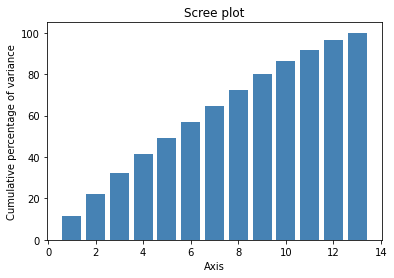

In [14]:
my_mca.plot_eigenvalues(type="cumulative") 

In [15]:
df_rows = my_mca.row_topandas()   
print(df_rows)

            row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
Salarié 1         0.374046        0.710277       -0.236277       -0.226184   
Salarié 2         0.006166       -1.068118        0.181460       -0.263650   
Salarié 3         0.603028        0.125399        0.339264        0.876230   
Salarié 4        -0.458488       -1.338579        0.754172        0.348172   
Salarié 5        -0.226739       -0.287572       -0.498889       -0.066868   
Salarié 6        -0.030433       -0.256346       -0.550505       -0.236882   
Salarié 7         0.202472       -1.036891        0.129844       -0.433664   
Salarié 8         0.490848        0.138282       -0.414697        0.055623   
Salarié 9        -0.397981       -0.567559       -1.026312       -1.078943   
Salarié 10        0.490848        0.138282       -0.414697        0.055623   
Salarié 11        0.721369        0.534480        0.685846       -0.142404   
Salarié 12       -0.772149       -0.076145        0.026242      

In [19]:
print("Coordonnées des points lignes dans chaque axe")
for i  in range(len(my_mca.row_coord_)):
    print ("les coordonées de l'emploi", df.index.values[i],"sont:",my_mca.row_coord_[i],"\n")

Coordonnées des points lignes dans chaque axe
les coordonées de l'emploi Salarié 1 sont: [ 0.37404621  0.71027735 -0.23627712 -0.22618361 -0.7212189  -0.05530119
  0.08631266 -0.08558562  0.69221244  0.27583419  0.54021537 -0.10499136
 -0.24703101] 

les coordonées de l'emploi Salarié 2 sont: [ 0.00616611 -1.06811784  0.18145969 -0.26365012  0.6193901   0.31952541
  0.75679589  0.0699123   0.41898141  0.68839084 -0.27524143  0.1223963
 -0.52445383] 

les coordonées de l'emploi Salarié 3 sont: [ 0.60302794  0.12539916  0.33926352  0.8762298   0.1788669  -0.36413118
 -0.5265007  -0.60096283  0.5856128   0.04168053 -0.22113389 -0.34934795
  0.46367051] 

les coordonées de l'emploi Salarié 4 sont: [-0.45848768 -1.3385793   0.75417176  0.34817181 -1.25381643  0.32297464
  0.59266489  0.10719232 -0.6052248   0.84688568 -0.27628244 -0.60300389
 -0.10270559] 

les coordonées de l'emploi Salarié 5 sont: [-0.22673892 -0.28757212 -0.49888933 -0.06686775  0.6193901   0.31952541
  0.75679589  0.069

In [20]:
print("Contribution des point ligne dans chaque axe")
for i  in range(len(my_mca.row_contrib_)):
    print ("les contribution de l'emploi", df.index.values[i],"sont:",my_mca.row_contrib_[i],"\n")

Contribution des point ligne dans chaque axe
les contribution de l'emploi Salarié 1 sont: [0.50034337 1.96298082 0.2337853  0.23253268 2.81165785 0.01653093
 0.04026959 0.03959405 2.5900436  0.47722586 2.25242244 0.09680818
 0.74690859] 

les contribution de l'emploi Salarié 2 sont: [1.35968905e-04 4.43913620e+00 1.37890454e-01 3.15949485e-01
 2.07375189e+00 5.51872914e-01 3.09589196e+00 2.64201568e-02
 9.48894180e-01 2.97233620e+00 5.84714096e-01 1.31565352e-01
 3.36650319e+00] 

les contribution de l'emploi Salarié 3 sont: [1.30044652 0.06118563 0.48200129 3.4897776  0.17293712 0.7167109
 1.49839454 1.95219634 1.85374243 0.01089668 0.37742147 1.07181868
 2.63137934] 

les contribution de l'emploi Salarié 4 sont: [0.7517492  6.9718549  2.38184995 0.55099662 8.49759802 0.56385198
 1.8986577  0.06210916 1.97998408 4.49859959 0.58914547 3.19333993
 0.12910786] 

les contribution de l'emploi Salarié 5 sont: [0.18385261 0.32177602 1.04227497 0.02032334 2.07375189 0.55187291
 3.09589196 0.0

In [21]:
print("Cos2 des point ligne dans chaque axe")
for i  in range(len(my_mca.row_cos2_)):
    print ("les Cos2 de l'emploi", df.index.values[i],"sont:",my_mca.row_cos2_[i],"\n")

Cos2 des point ligne dans chaque axe
les Cos2 de l'emploi Salarié 1 sont: [0.06335087 0.22843254 0.02527815 0.02316457 0.23552458 0.00138475
 0.00337327 0.00331668 0.21696059 0.03445072 0.13214049 0.00499125
 0.02763153] 

les Cos2 de l'emploi Salarié 2 sont: [1.14453827e-05 3.43436691e-01 9.91216860e-03 2.09249433e-02
 1.15488003e-01 3.07340050e-02 1.72411359e-01 1.47134822e-03
 5.28442649e-02 1.42652214e-01 2.28053082e-02 4.50967197e-03
 8.27985773e-02] 

les Cos2 de l'emploi Salarié 3 sont: [0.13006729 0.00562448 0.04116874 0.27461816 0.01144335 0.04742518
 0.09914964 0.12917797 0.12266321 0.00062138 0.01749057 0.04365255
 0.07689749] 

les Cos2 de l'emploi Salarié 4 sont: [0.03355258 0.28599521 0.09078437 0.01934897 0.25092184 0.01664974
 0.05606463 0.00183399 0.05846608 0.1144775  0.01218364 0.05803778
 0.00168368] 

les Cos2 de l'emploi Salarié 5 sont: [0.02919392 0.04696062 0.14133467 0.00253906 0.21785564 0.05797638
 0.3252354  0.00277554 0.099685   0.00973702 0.02434834 0.0015

In [22]:
# Extraction des statistiques sur les points colonnes

In [23]:
df_cols = my_mca.col_topandas()  # 
print(df_cols)

                           col_coord_dim1  col_coord_dim2  col_coord_dim3  \
Work_accident_Accident           0.495293       -1.591332        1.337018   
Work_accident_No accident       -0.077390        0.248646       -0.208909   
left_left                       -1.372737        0.389361        0.434048   
left_stay                        0.292551       -0.082979       -0.092502   
sales_IT                        -0.030868        1.118916       -0.320113   
sales_RandD                      1.165297       -2.131744        1.382112   
sales_accounting                 1.858421        1.427036       -0.745457   
sales_hr                        -0.647422       -0.963067       -1.806684   
sales_management                 0.823152        0.704510        1.775187   
sales_marketing                  0.532168       -0.259815        0.987662   
sales_product_mng               -1.368882       -0.940614        0.693103   
sales_sales                      0.256332       -0.229446       -0.725529   

In [24]:
# l'Attribut col_coord_ contient les coordonnées des points collones ou bien les coordonnée des modalitées dans chaque axe 
print("Coordonnées des points colonnes - modalités dans chaque axe")
for i  in range(len(my_mca.col_coord_)):
    print ("Les coordonnées de la modalité", df_cols.index.values[i],"sont:",my_mca.col_coord_[i],"\n")

Coordonnées des points colonnes - modalités dans chaque axe
Les coordonnées de la modalité Work_accident_Accident sont: [ 4.95293285e-01 -1.59133154e+00  1.33701788e+00 -3.71191239e-01
 -4.41040407e-19  4.93909457e-16 -5.36483417e-31 -5.89869755e-19
  5.89869755e-19  8.95117969e-01 -9.86835736e-02  2.36206639e-01
 -9.11142425e-01] 

Les coordonnées de la modalité Work_accident_No accident sont: [-7.73895759e-02  2.48645554e-01 -2.08909044e-01  5.79986311e-02
  8.13175265e-17  5.38210663e-16  4.05108826e-17  8.56960978e-18
 -1.60090390e-17 -1.39862183e-01  1.54193084e-02 -3.69072873e-02
  1.42366004e-01] 

Les coordonnées de la modalité left_left sont: [-1.37273710e+00  3.89361326e-01  4.34047958e-01  1.01890580e+00
  1.63165037e-16  1.90352178e-15 -1.74126106e-15 -2.18843318e-15
 -8.25189709e-16 -6.63689540e-01  1.25855103e-01  8.10637204e-01
 -5.62383898e-01] 

Les coordonnées de la modalité left_stay sont: [ 2.92550530e-01 -8.29786432e-02 -9.25020239e-02 -2.17143859e-01
  4.04648596e

In [25]:
print("Contributions des points colonnes - modalités dans chaque axe")
for i  in range(len(my_mca.col_contrib_)):
    print ("Les contributions de la modalité", df_cols.index.values[i],"sont:",my_mca.col_contrib_[i],"\n")

Contributions des points colonnes - modalités dans chaque axe
Les contributions de la modalité Work_accident_Accident sont: [2.19322162e+00 2.46332367e+01 1.87149345e+01 1.56565891e+00
 2.62860325e-36 3.29657503e-30 3.88938455e-60 4.70197740e-36
 4.70197740e-36 1.25640115e+01 1.87908191e-01 1.22498039e+00
 2.54025346e+01] 

Les contributions de la modalité Work_accident_No accident sont: [3.42690878e-01 3.84894324e+00 2.92420852e+00 2.44634205e-01
 5.71895361e-31 2.50526027e-29 1.41935707e-31 6.35141291e-33
 2.21655638e-32 1.96312679e+00 2.93606549e-02 1.91403185e-01
 3.96914604e+00] 

Les contributions de la modalité left_left sont: [2.19015945e+01 1.91711918e+00 2.56408647e+00 1.53360368e+01
 4.67698354e-31 6.36542395e-29 5.32646905e-29 8.41352936e-29
 1.19624253e-29 8.97927084e+00 3.97320514e-01 1.87560487e+01
 1.25809554e+01] 

Les contributions de la modalité left_stay sont: [4.66755293e+00 4.08566383e-01 5.46444658e-01 3.26833571e+00
 1.34975266e-31 1.09093968e-27 6.35172949e-30 

In [26]:
print("Cos2 des points colonnes - modalités dans chaque axe")
for i  in range(len(my_mca.col_cos2_)):
    print ("Les cos2 de la modalité", df_cols.index.values[i],"sont:",my_mca.col_cos2_[i],"\n")

Cos2 des points colonnes - modalités dans chaque axe
Les cos2 de la modalité Work_accident_Accident sont: [3.83305373e-02 3.95677513e-01 2.79315128e-01 2.15285837e-02
 3.03932251e-38 3.81166488e-32 4.49710088e-62 5.43666137e-38
 5.43666137e-38 1.25193153e-01 1.52163245e-03 8.71774627e-03
 1.29715706e-01] 

Les cos2 de la modalité Work_accident_No accident sont: [3.83305373e-02 3.95677513e-01 2.79315128e-01 2.15285837e-02
 4.23202567e-32 1.85389260e-30 1.05032423e-32 4.70004556e-34
 1.64025172e-33 1.25193153e-01 1.52163245e-03 8.71774627e-03
 1.29715706e-01] 

Les cos2 de la modalité left_left sont: [4.01594967e-01 3.23086745e-02 4.01503146e-02 2.21249137e-01
 5.67371774e-33 7.72198971e-31 6.46161820e-31 1.02065766e-30
 1.45117946e-31 9.38735978e-02 3.37563263e-03 1.40044669e-01
 6.74030071e-02] 

Les cos2 de la modalité left_stay sont: [4.01594967e-01 3.23086745e-02 4.01503146e-02 2.21249137e-01
 7.68320743e-33 6.20996434e-29 3.61559986e-31 1.53893165e-30
 7.73890017e-31 9.38735978e-02

# Représentation graphique¶

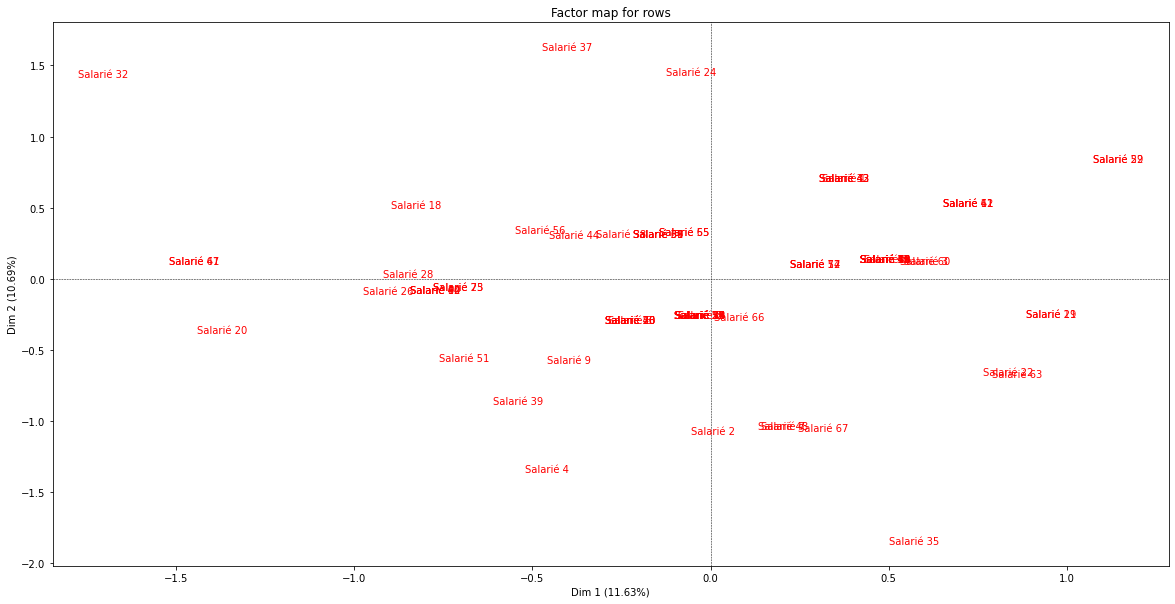

In [28]:
# Mapping des points lignes （individus）
my_mca.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(20,10))  # Axe 1 et Axe 2

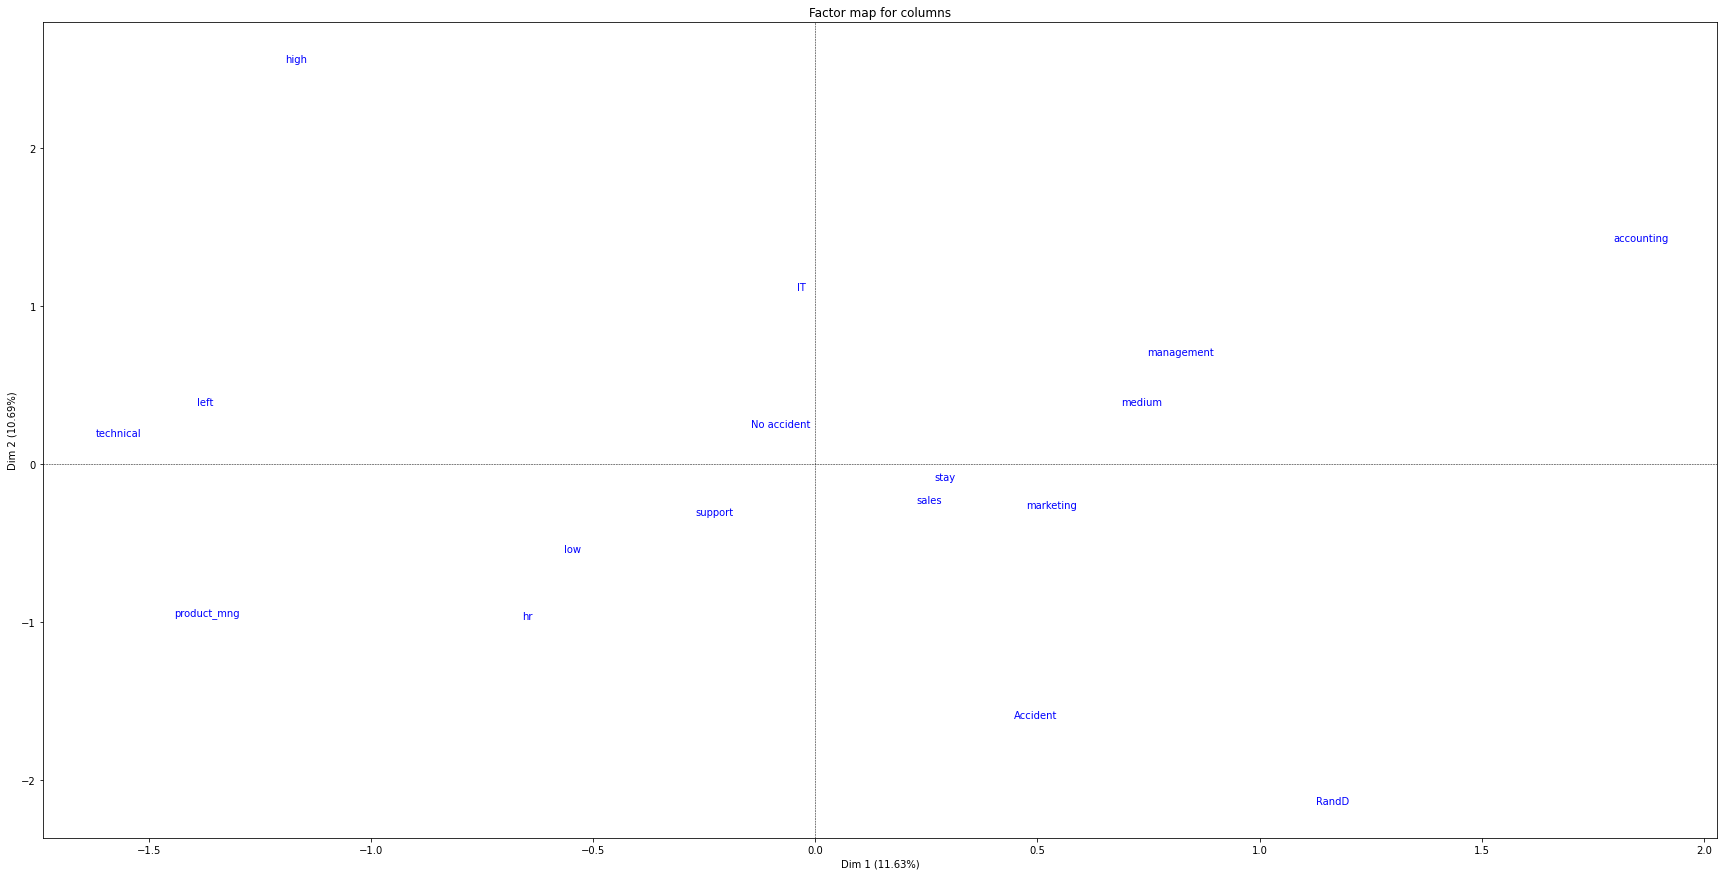

In [29]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(30,15))

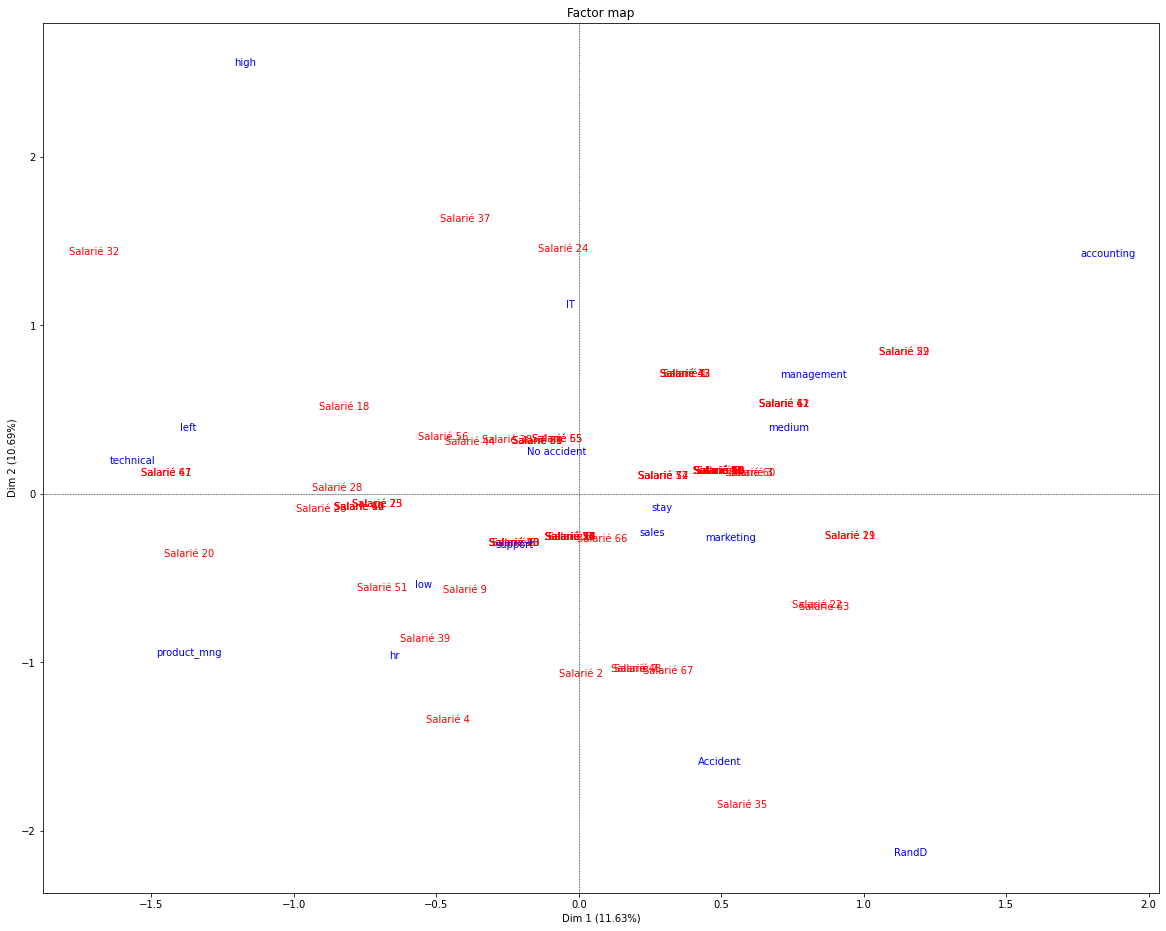

In [30]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2,figsize=(20,16))   

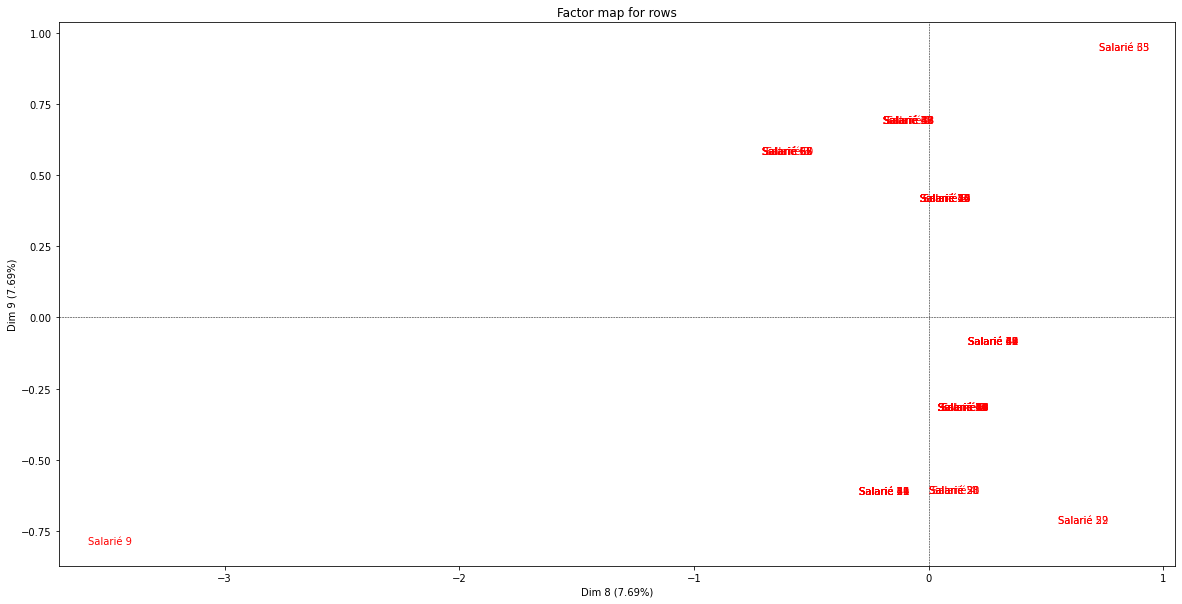

In [34]:
# Mapping des points lignes （individus）
my_mca.mapping_row(num_x_axis=8, num_y_axis=9, figsize=(20,10))  # Axe 8 et Axe 9

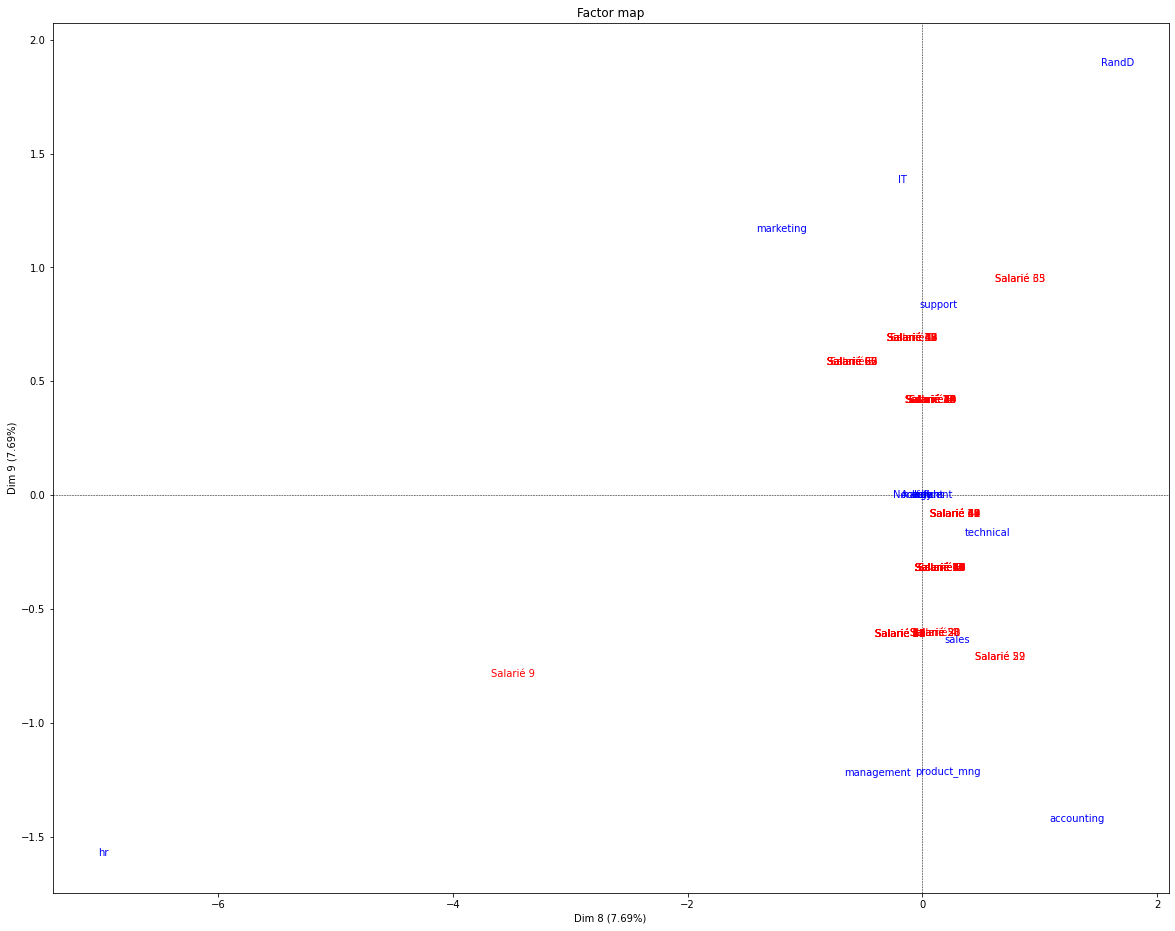

In [33]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 8 et 9 qui sont ici représentés
my_mca.mapping(num_x_axis=8, num_y_axis=9,figsize=(20,16))   

Axe 9 n'est pas bien choisi.